### Unsupervised Learning

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

General References:
SciPy documentation:
- [Spacial Distances](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html)
- [Linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)
- [Dendrograms](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)


Geeks for geeks on dendrograms:
- [Cluster Hierarchy Dendrogram](https://www.geeksforgeeks.org/scipy-cluster-hierarchy-dendrogram/#s://)


# Graded


#### Use the GeneExpression data set from the data repo. The Gene Expression data set consists of 40 tissue samples with measurements on 1, 000 genes. The first 20 samples are from healthy patients, while the second 20 are from a diseased group.

In [ ]:
# Load the data
file_path = 'https://raw.githubusercontent.com/dsahota-applied-data-analysis/data/main/GeneExpression.csv'
gene_expression_data = pd.read_csv(file_path)

# Display the first few rows and the structure of the data
gene_expression_data.head(), gene_expression_data.shape

#### Apply hierarchical clustering to the samples using correlation-based distance, with single, complete, and average linkage, and plot the dendrograms. Do the genes separate the samples into the two groups? Do your results depend on the type of linkage used?


In [ ]:

# Transpose the data so that samples are rows and genes are columns
transposed_data = gene_expression_data.T

# Use correlation-based distance matrix
# Reference: use sci py library to obtain the spacial distance
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
correlation_distance = pdist(transposed_data, metric='correlation') # mark metric as correlation here


In [ ]:

# Perform hierarchical clustering using single, complete, and average linkage
# Reference for parameters in linkage:
# SciPy documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
single_linkage = linkage(correlation_distance, method='single')
complete_linkage = linkage(correlation_distance, method='complete')
average_linkage = linkage(correlation_distance, method='average')


Text(0.5, 1.0, 'Single Linkage')

Text(0.5, 1.0, 'Complete Linkage')

Text(0.5, 1.0, 'Average Linkage')

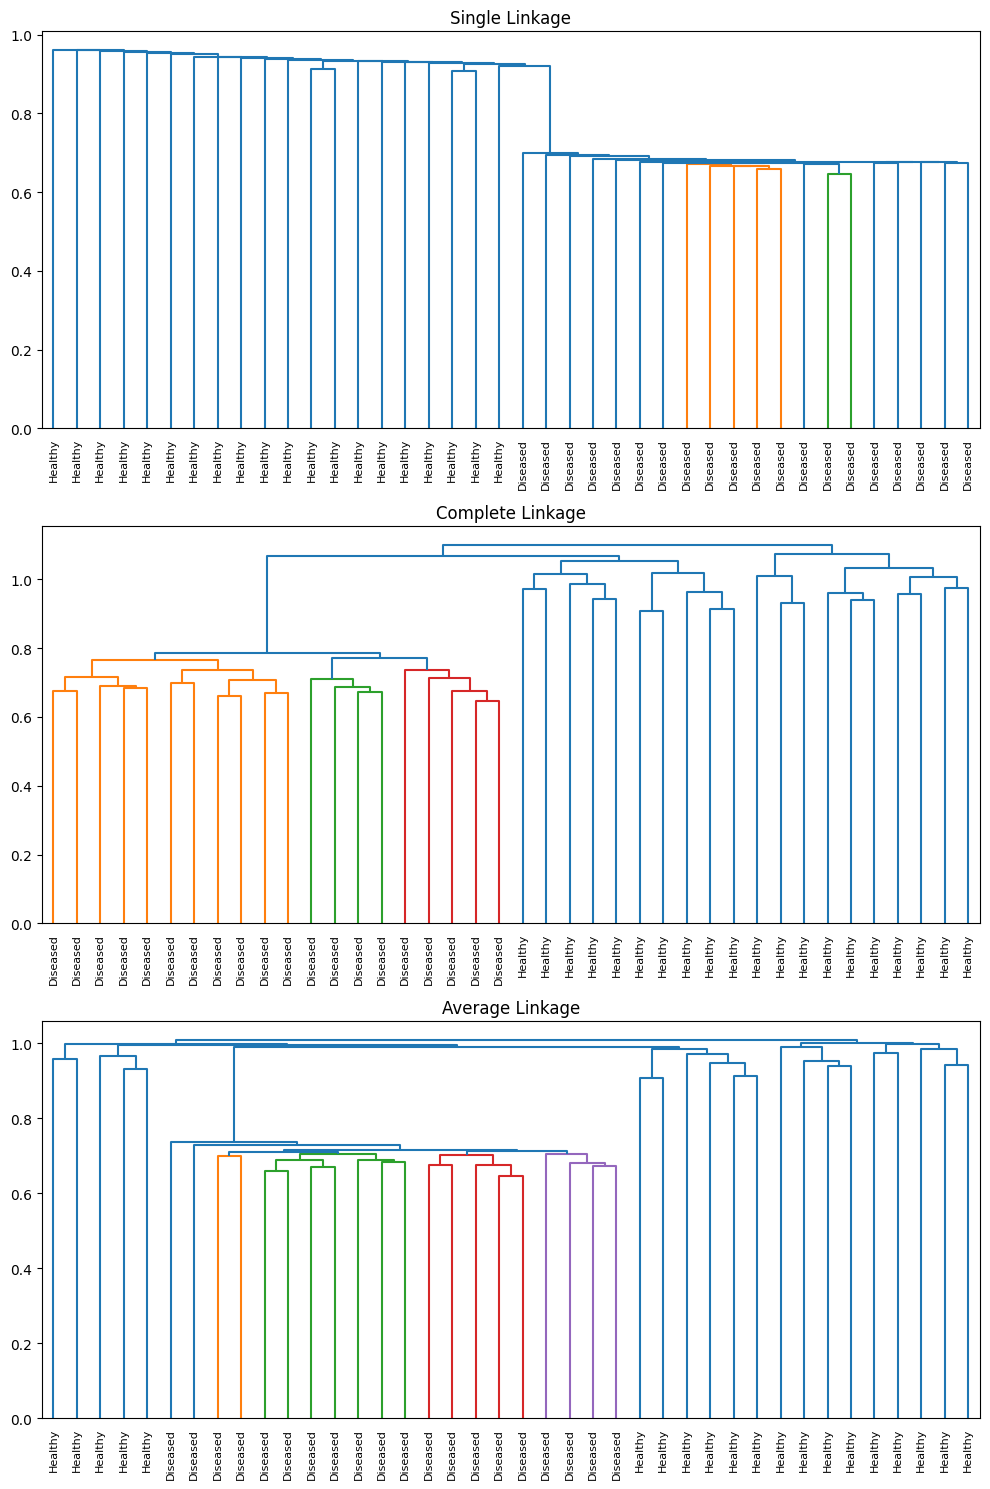

In [ ]:

# Create dendrograms for each linkage method
# Reference for creating dendrograms: G4G
# https://www.geeksforgeeks.org/scipy-cluster-hierarchy-dendrogram/#
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
single = dendrogram(single_linkage, ax=axes[0], labels=['Healthy']*20 + ['Diseased']*20, leaf_rotation=90)
axes[0].set_title('Single Linkage')

complete = dendrogram(complete_linkage, ax=axes[1], labels=['Healthy']*20 + ['Diseased']*20, leaf_rotation=90)
axes[1].set_title('Complete Linkage')

average = dendrogram(average_linkage, ax=axes[2], labels=['Healthy']*20 + ['Diseased']*20, leaf_rotation=90)
axes[2].set_title('Average Linkage')

plt.tight_layout()
plt.show()


ANALYSIS:

- **Single Linkage:** The clustering shows some mixed clusters, but there is a hint of separation between healthy and diseased samples in larger groups, although there are a few misplacements.

- **Complete Linkage:** This method seems to provide a better separation between the two groups, with clearer clustering of the diseased samples away from the healthy ones.

- **Average Linkage:** In average linkage, the Healthy samples did not cluster together as neatly, though there was a clear separation between healthy and diseased groups.

The complete linkage method provided the most effective separation for the samples into healthy and diseased groups. This suggests that the choice of linkage has influence over the results in hierarchical clustering. Single linkage, while not as clean in separation, still shows some degree of clustering by health status

*Pass: Apply clustering and plot the dendrograms. Identify which, if any, of the linkages separate the samples into the two groups, and indicate whether it matters which linkage is used*
